In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.family'] = 'sans-serif'

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [3]:
DF = pd.read_csv('From_2005_4_Room.csv')
DF.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,Distance_to_Raffles,MRT,Walk_Time_to_MRT,Shopping_Mall,Walk_Time_to_Mall,Travel_Time,storey,remain_lease,town_premium,flat_model_premium
0,2015-01,ANG MO KIO,4 ROOM,612,ANG MO KIO AVE 4,04 TO 06,91.0,New Generation,1980,64.0,...,10.679973,Yio Chu Kang,9.651508,Broadway Plaza,13.089647,24.7,5,61,21000,-24000
1,2015-01,ANG MO KIO,4 ROOM,177,ANG MO KIO AVE 4,01 TO 03,91.0,New Generation,1981,65.0,...,10.679973,Yio Chu Kang,9.651508,Broadway Plaza,13.089647,24.7,2,62,21000,-24000
2,2015-01,ANG MO KIO,4 ROOM,254,ANG MO KIO AVE 4,07 TO 09,97.0,New Generation,1977,61.0,...,10.679973,Yio Chu Kang,9.651508,Broadway Plaza,13.089647,24.7,8,58,21000,-24000
3,2015-01,ANG MO KIO,4 ROOM,117,ANG MO KIO AVE 4,10 TO 12,98.0,New Generation,1978,62.0,...,10.679973,Yio Chu Kang,9.651508,Broadway Plaza,13.089647,24.7,11,59,21000,-24000
4,2015-02,ANG MO KIO,4 ROOM,175,ANG MO KIO AVE 4,04 TO 06,91.0,New Generation,1981,65.0,...,10.679973,Yio Chu Kang,9.651508,Broadway Plaza,13.089647,24.7,5,62,21000,-24000


In [4]:
#Drop NA values inside dataset. There are several street name that could not be identified using one-map API
#For ease of analyse, we just drop those rows with NA values.
DF = DF.dropna()

In [5]:
DF.describe()

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,year,LATITUDE,LONGITUDE,Distance_to_Raffles,Walk_Time_to_MRT,Walk_Time_to_Mall,Travel_Time,storey,remain_lease,town_premium,flat_model_premium
count,34605.000000,34605.000000,34605.000000,3.460500e+04,34605.000000,34605.000000,34605.000000,34605.000000,34605.000000,34605.000000,34605.000000,34605.000000,34605.000000,34605.000000,34605.000000
mean,95.901795,1995.315908,77.278226,4.406973e+05,2016.574917,103.840383,1.368866,12.589505,9.293543,7.870241,28.738474,8.771651,76.315908,-4172.123682,-8021.702066
std,7.614444,10.945946,10.877755,1.184703e+05,1.106864,0.071535,0.043169,4.470728,5.273297,4.384387,9.403817,6.179326,10.945946,60823.218040,67777.712466
min,70.000000,1967.000000,49.000000,2.250000e+05,2015.000000,103.690722,1.271463,0.764559,0.322260,0.628782,4.600000,2.000000,48.000000,-71000.000000,-69000.000000
25%,91.000000,1986.000000,68.000000,3.620000e+05,2016.000000,103.776497,1.340062,9.775773,5.647955,4.703258,23.000000,5.000000,67.000000,-56000.000000,-24000.000000
50%,94.000000,1996.000000,78.000000,4.090000e+05,2017.000000,103.846509,1.365758,13.359225,8.830208,7.361006,30.600000,8.000000,77.000000,-11000.000000,-11000.000000
75%,103.000000,2003.000000,85.000000,4.750000e+05,2018.000000,103.898645,1.397748,15.874781,11.984174,10.349421,34.200000,11.000000,84.000000,21000.000000,-11000.000000
max,136.000000,2016.000000,97.000000,1.028000e+06,2018.000000,103.962717,1.455512,20.122617,32.705443,30.214191,48.200000,50.000000,97.000000,209000.000000,486000.000000


In [6]:
# y is the resale_price, target variable for our model
y = DF[['resale_price']]
y.head()

,resale_price
0,410000.0
1,450000.0
2,465000.0
3,476000.0
4,438000.0


In [7]:
# x is the input variable that will be used to predict resale price. we have used almost all the data columns we have in dataset.
x = DF[['floor_area_sqm','Walk_Time_to_MRT','Walk_Time_to_Mall','Travel_Time','storey','remain_lease','town_premium','flat_model_premium']]

In [8]:
x.head()

,floor_area_sqm,Walk_Time_to_MRT,Walk_Time_to_Mall,Travel_Time,storey,remain_lease,town_premium,flat_model_premium
0,91.0,9.651508,13.089647,24.7,5,61,21000,-24000
1,91.0,9.651508,13.089647,24.7,2,62,21000,-24000
2,97.0,9.651508,13.089647,24.7,8,58,21000,-24000
3,98.0,9.651508,13.089647,24.7,11,59,21000,-24000
4,91.0,9.651508,13.089647,24.7,5,62,21000,-24000


In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=4)

In [10]:
#double check the input data/ target variable size information. 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(27684, 8) (27684, 1)
(6921, 8) (6921, 1)


In [11]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

/anaconda3/envs/CS5242/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [12]:
predictions = lm.predict(X_test)

In [13]:
model.coef_

array([[ 2.56438799e+03, -4.00353524e+03,  8.53113184e+02,
        -4.23526984e+03,  4.13536512e+03,  1.90296084e+03,
         7.18856515e-01,  2.88864582e-01]])

Text(0,0.5,'Predictions')

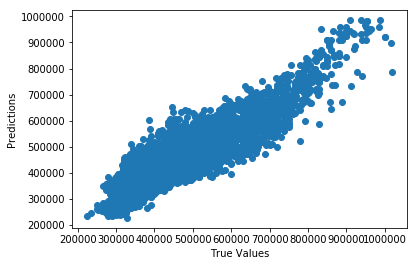

In [14]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [15]:
#Returns the coefficient of determination R^2 of the prediction.
print ("Score:", model.score(X_test, y_test))

Score: 0.7972531192249587


In [16]:
#The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() 
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it 
#can be negative (because the model can be arbitrarily worse). A constant model that always predicts the 
#expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [17]:
from sklearn import ensemble
clf2 = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth=5, min_samples_split = 2, learning_rate=0.1, 
                                          loss = 'ls')

In [18]:
clf2.fit(X_train,y_train)

/anaconda3/envs/CS5242/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [19]:
clf2.score(X_test,y_test)

0.955071020510359

In [20]:
clf2.feature_importances_

array([0.14193712, 0.15852641, 0.17309154, 0.1105988 , 0.11312629,
       0.16717008, 0.09330937, 0.0422404 ])